# About Dataset
## Detailed data description of Credit Risk dataset:

* **person_age:**	Age
* **person_income:**	Annual Income
* **person_home_ownership:**	Home ownership
* **person_emp_length:**	Employment length (in years)
* **loan_intent:**	Loan intent
* **loan_grade:**	Loan grade
* **loan_amnt:**	Loan amount
* **loan_int_rate:**	Interest rate
* **loan_status**	Loan status (0 is non default 1 is default)
* **loan_percent_income:**	Percent income
* **cb_person_default_on_file:**	Historical default
* **cb_preson_cred_hist_length:**	Credit history length

# Importing

In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

# Loading in and exploring the data

In [473]:
df = pd.read_csv('Kaggle/credit_risk_dataset.csv')

df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Let's use the describe function to see some anomalies in our dataset

In [474]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


* **person_age:** The max value of the person age is 144, which I highly doubt.
* **person_emp_lenght:** The same reason as the person_age case.
* **person_income:**  The maximum value is 6 million dollars, which might carries a bad effect.

In [475]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

**There are some missing values. To solve this we can fill them up with the mode values.**

In [476]:
emp_mode = df['person_emp_length'].mode()[0]
int_rate_mode = df['loan_int_rate'].mode()[0]

df['person_emp_length'].fillna(value = emp_mode, inplace = True)
df['loan_int_rate'].fillna(value = int_rate_mode, inplace = True)

df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [477]:
df = df[(df['person_age'] < 60) & (df['person_emp_length'] < 45) & (df['person_income'] < 250_000)]

df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32237.000000,32237.000000,32237.000000,32237.000000,32237.000000,32237.000000,32237.000000,32237.000000
mean,27.580203,63034.705215,4.630425,9517.382201,10.669162,0.218879,0.171090,5.729441
std,5.886774,35152.250774,4.024104,6239.051656,3.246491,0.413493,0.106592,3.928241
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,38400.000000,2.000000,5000.000000,7.510000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,78000.000000,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,59.000000,249999.000000,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [478]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

**The dataset contains some object type columns, which can't be utilized by the models. To get over this we will use One-Hot encoder later.**

In [479]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()}')

person_age : 40
person_income : 4175
person_home_ownership : 4
person_emp_length : 32
loan_intent : 6
loan_grade : 7
loan_amnt : 749
loan_int_rate : 347
loan_status : 2
loan_percent_income : 76
cb_person_default_on_file : 2
cb_person_cred_hist_length : 29


In [480]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19


# Plotting
* **Let's creat some chart to see if we can spot:**
    * Signifcant data imbalancement
    * Outlying data
    * Interesting data features
    * And have a better overview of our dataset

In [481]:
categorical_columns = df[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']]
numerical_columns = df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]

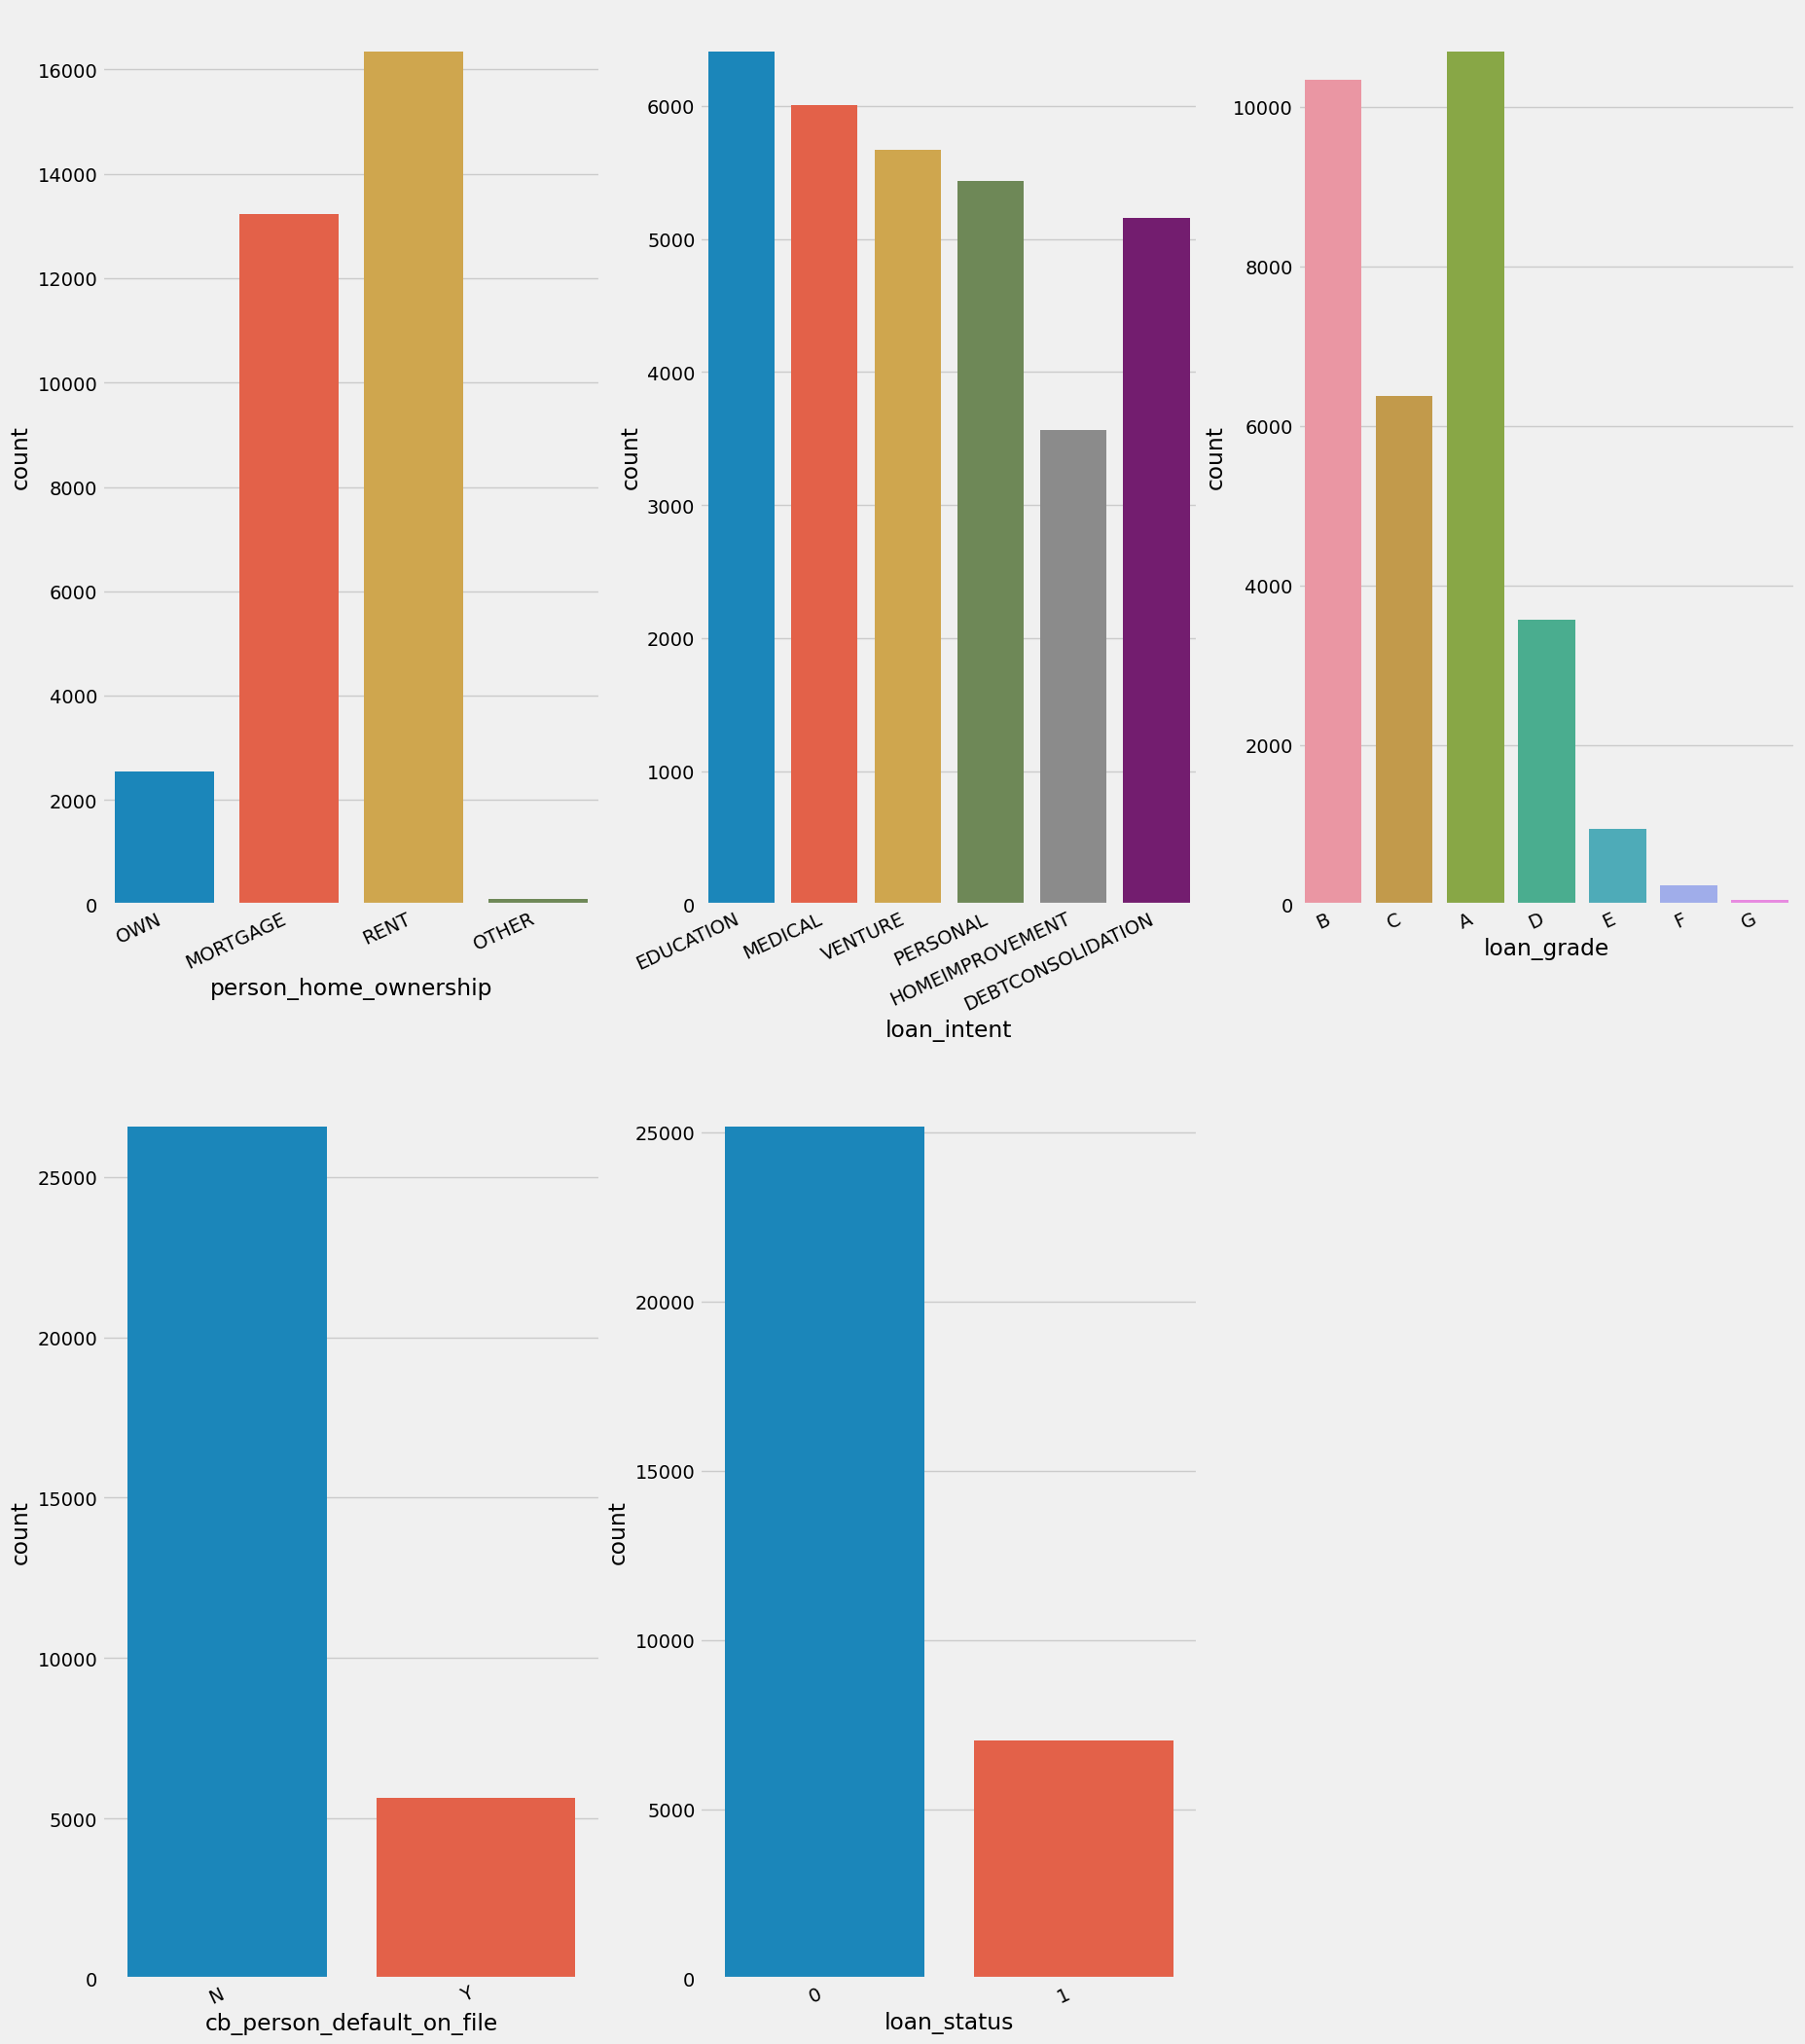

In [482]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(2, 3, figsize = (20, 25))
axes = axes.flatten()

for i, column in enumerate(categorical_columns.columns):
    sns.countplot(x = categorical_columns[column], ax = axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.show()

**In the dataset the target value (loan_status) there are far less ones then zeros. It may cause some imbalancement, but we will see.**

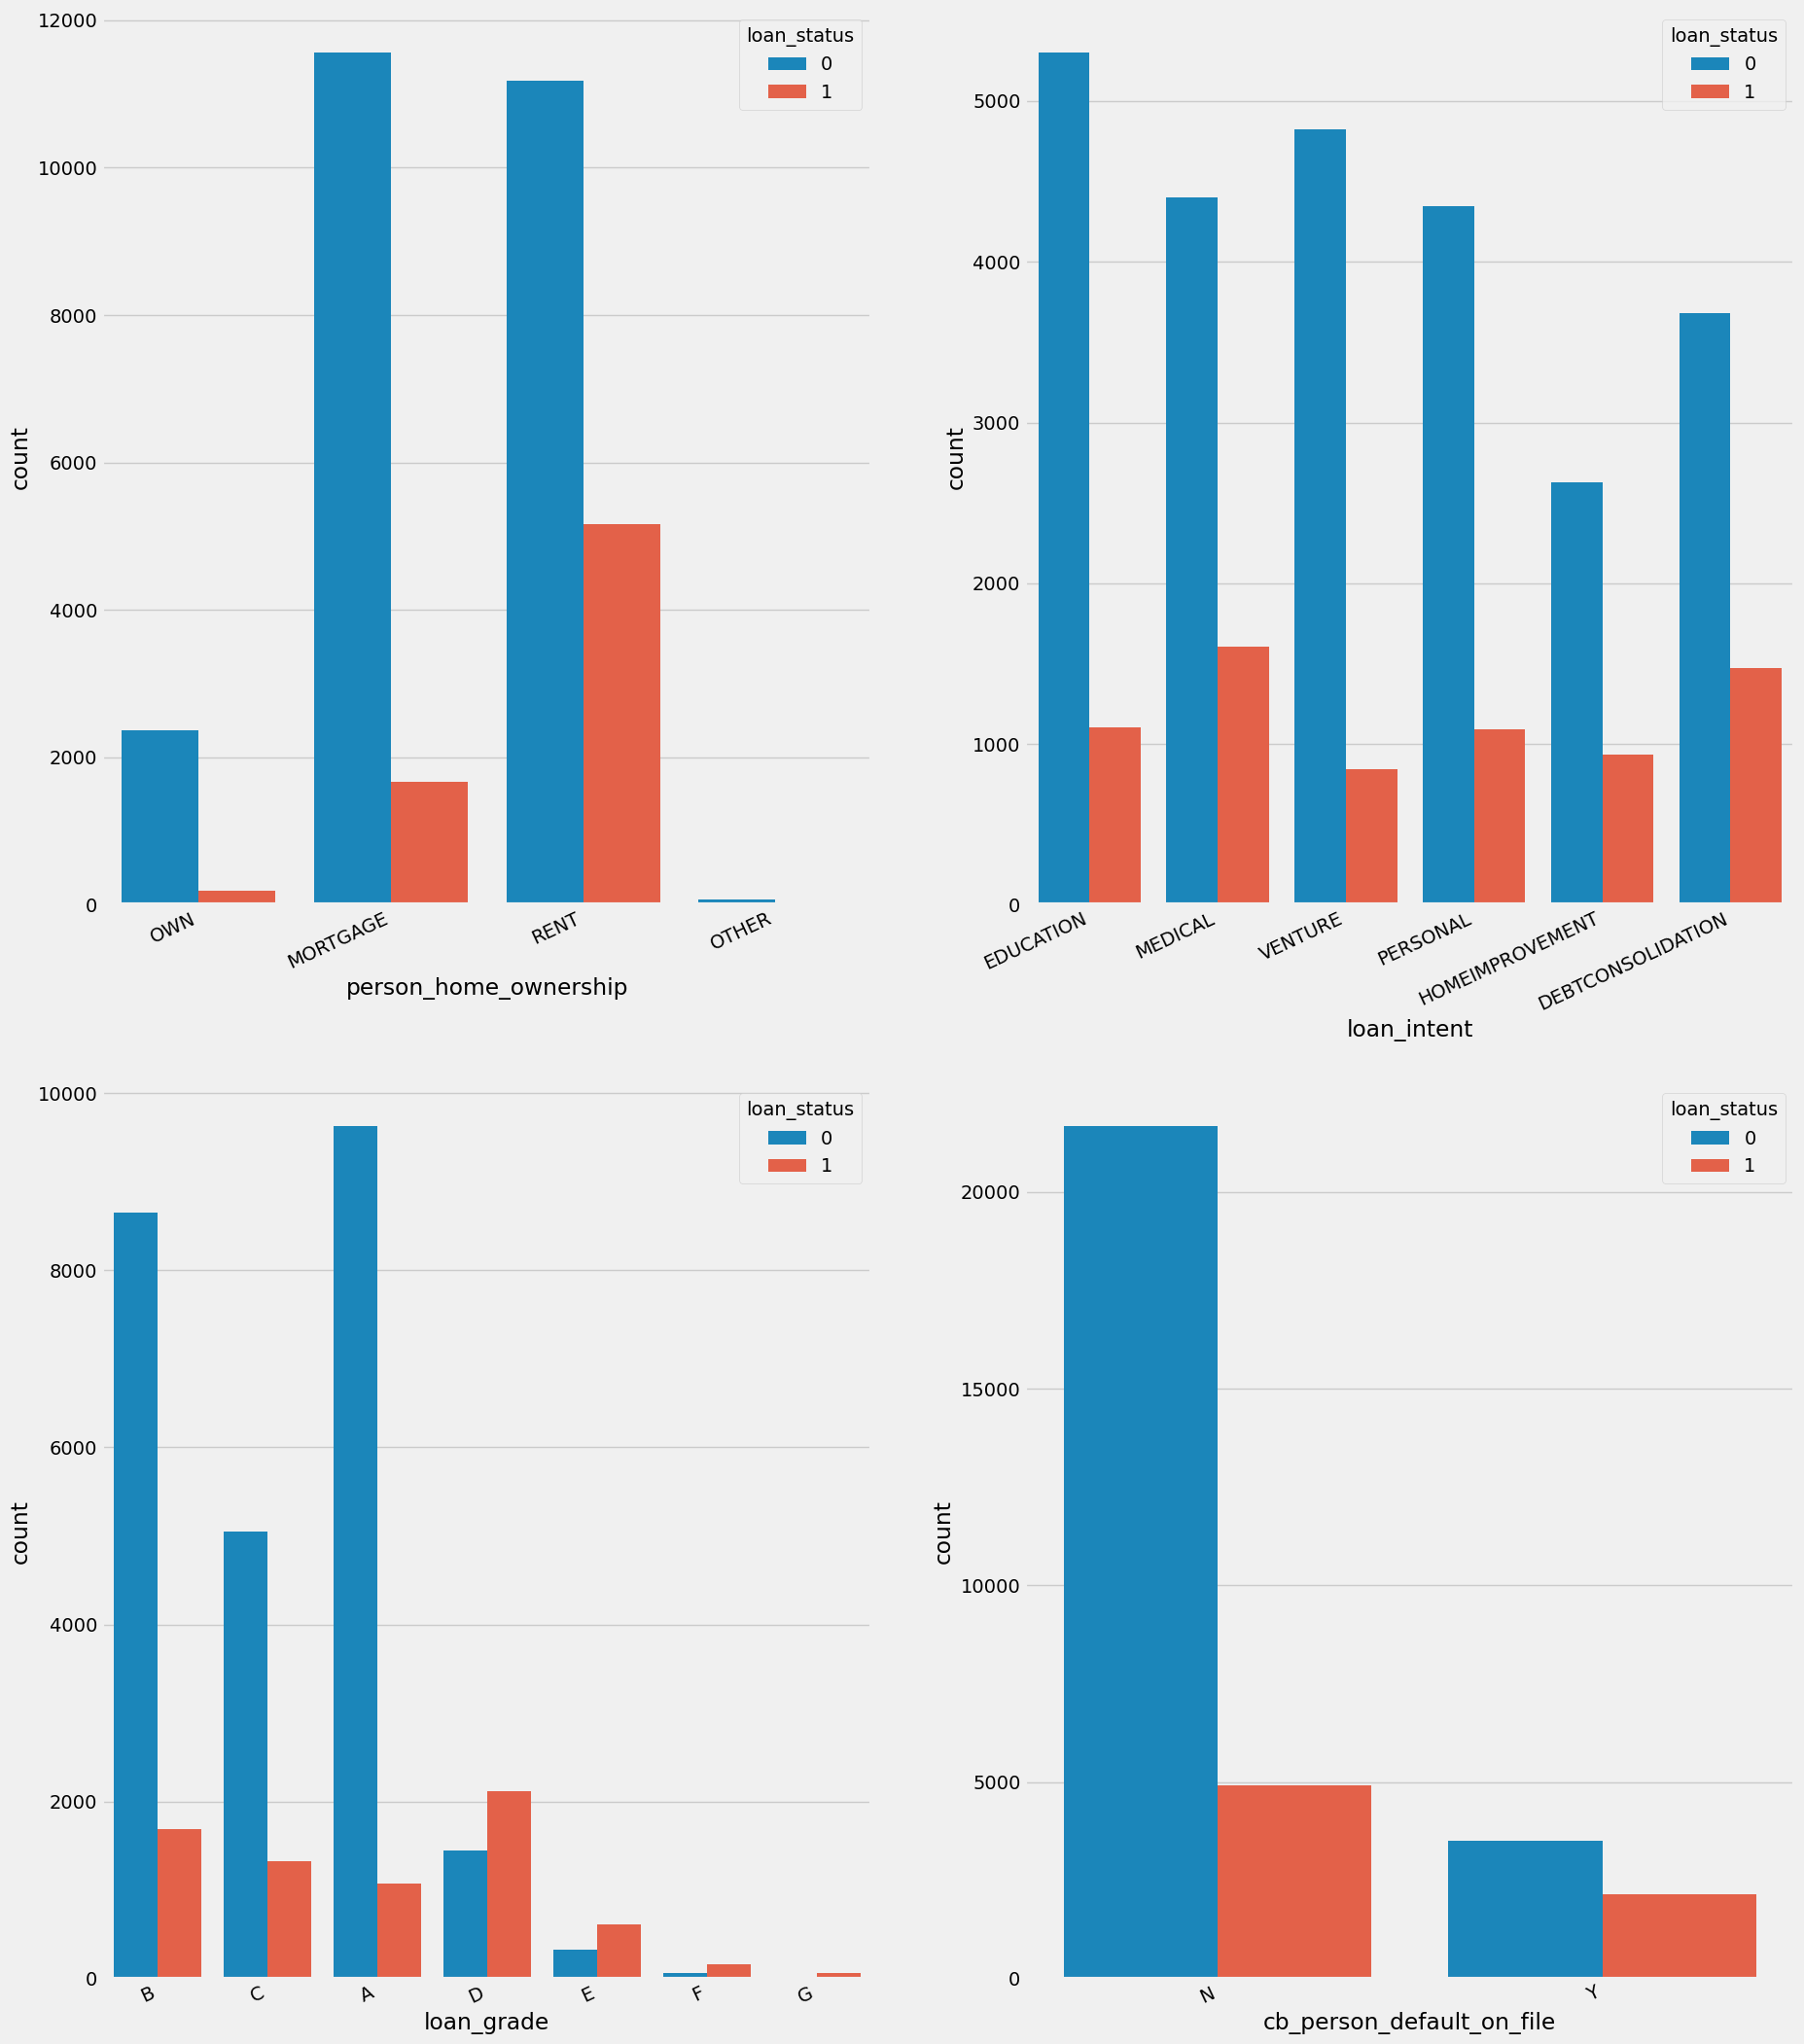

In [483]:
fig, axes = plt.subplots(2, 2, figsize = (20, 25))
axes = axes.flatten()

for i, column in enumerate(categorical_columns.columns):
    if column != 'loan_status':
        sns.countplot(data = categorical_columns,x = categorical_columns[column], ax = axes[i], hue = 'loan_status')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.show()

* **person_home_ownership:** If the person owns the house or has a mortgage on it, then there is a lot higher chance to get the loan.
* **loan_grade:** If the person's loan grade is lower than C, then there is a higher chance of rejection.

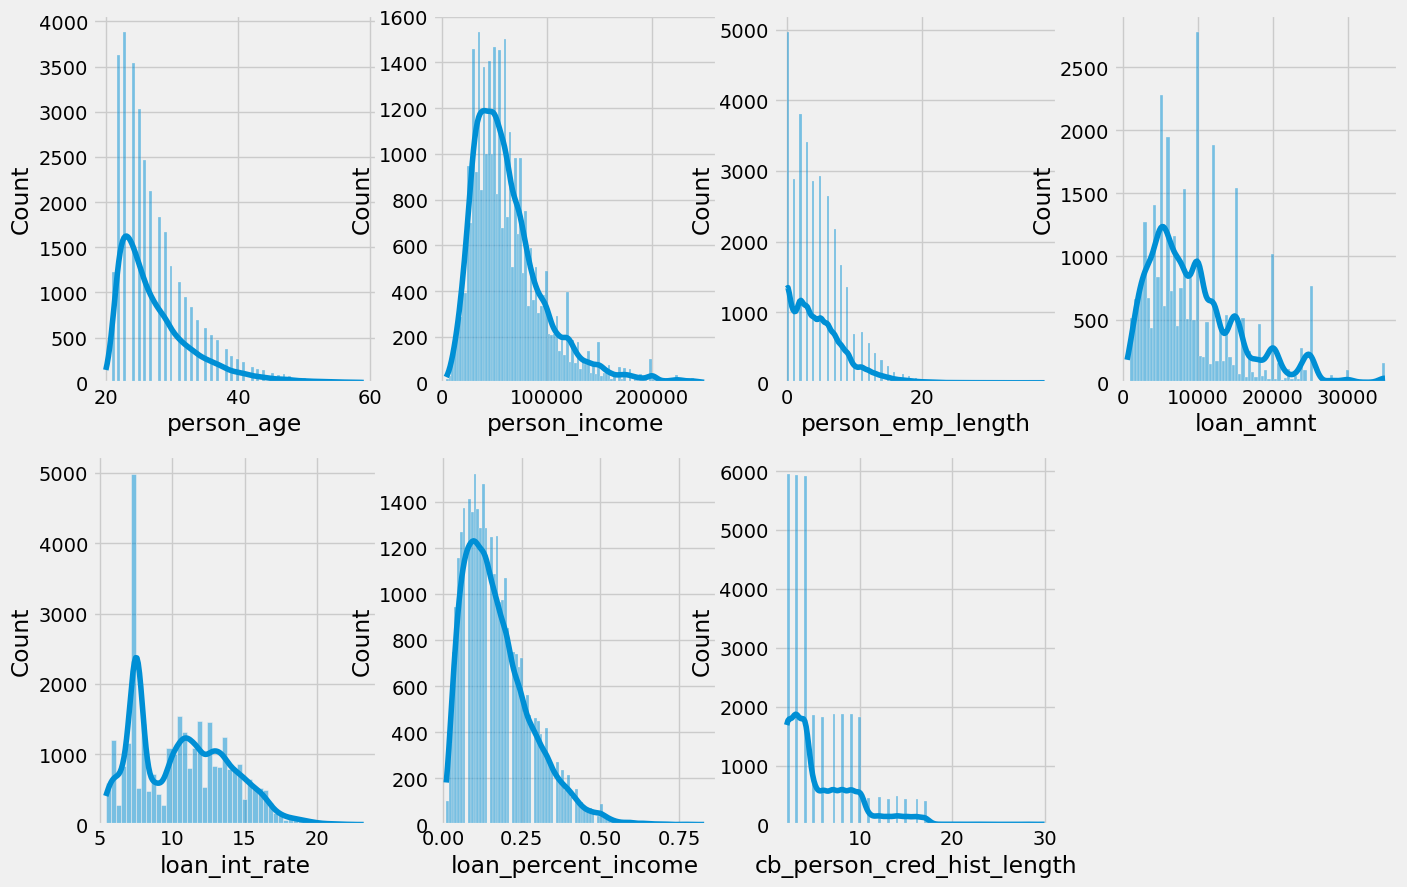

In [484]:
fig, axes = plt.subplots(2, 4, figsize = (15, 10))
axes = axes.flatten()

for i, column in enumerate(numerical_columns.columns):
    sns.histplot(x = numerical_columns[column], ax = axes[i], kde = True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.show()

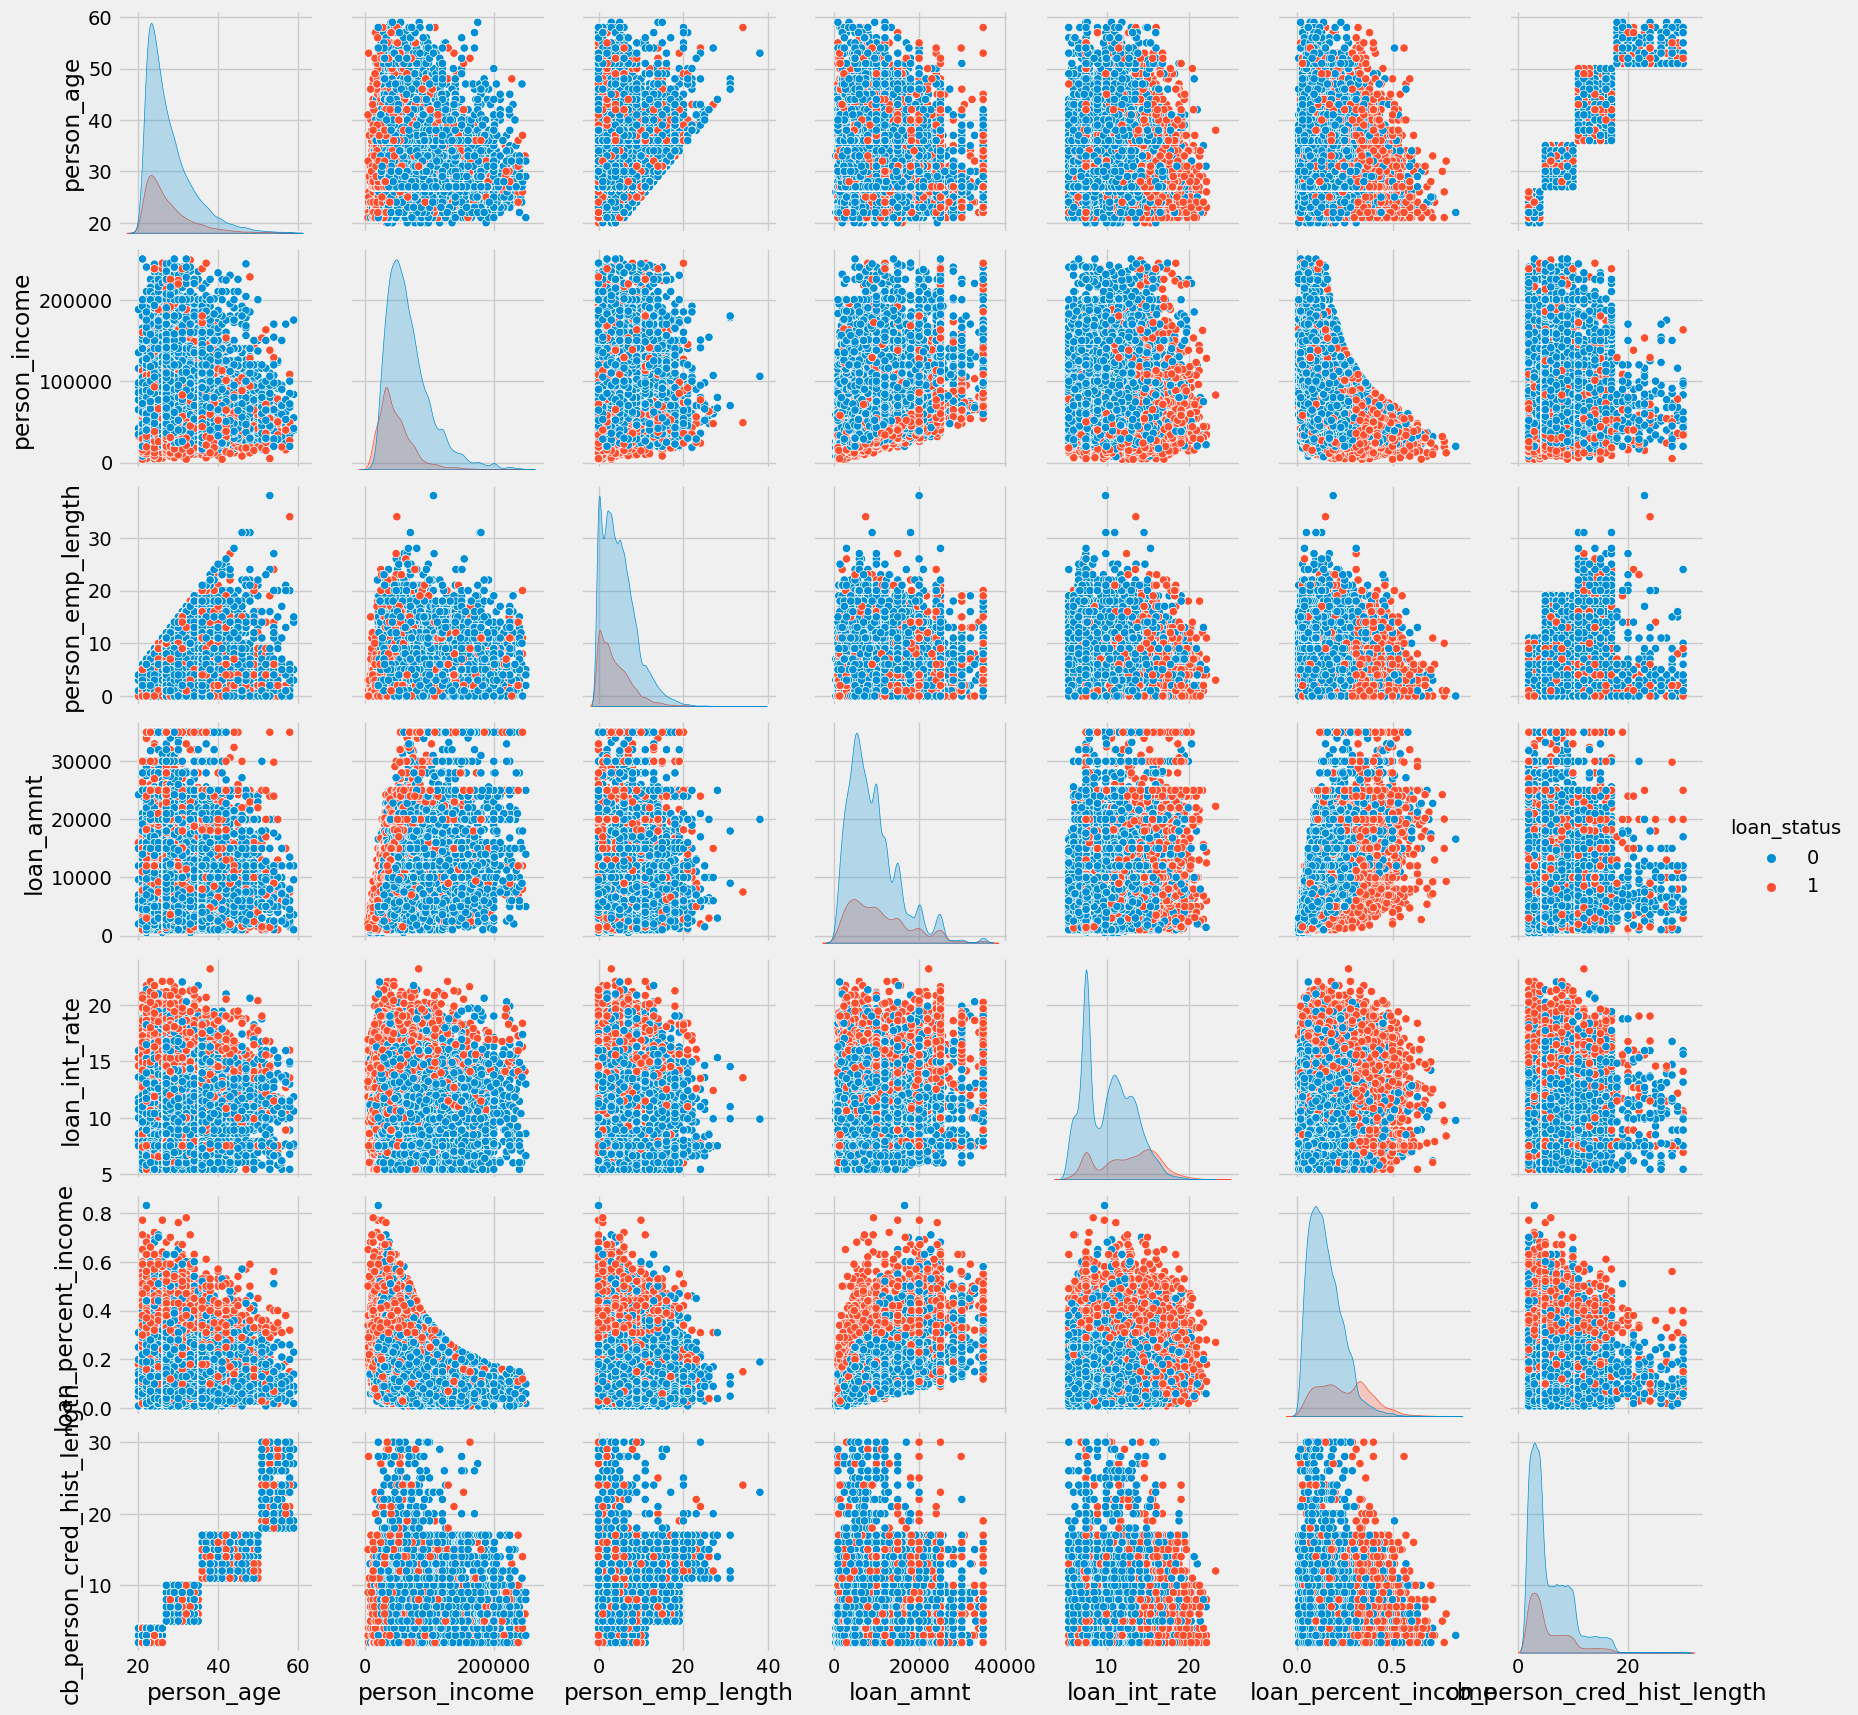

In [485]:
sns.pairplot(df, hue = 'loan_status', vars = numerical_columns.columns)
plt.show()

* **loan_percent_income:** It looks liek those who have a higher income loan ratio has a higher chance of rejection, meanwhile having a low percent has a higher rate of acceptance.
* **loan_int_rate:** We have the same situation with the loan interest rate.

C:\Users\ZEPHYRUS\AppData\Local\Temp\ipykernel_17048\2858361832.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


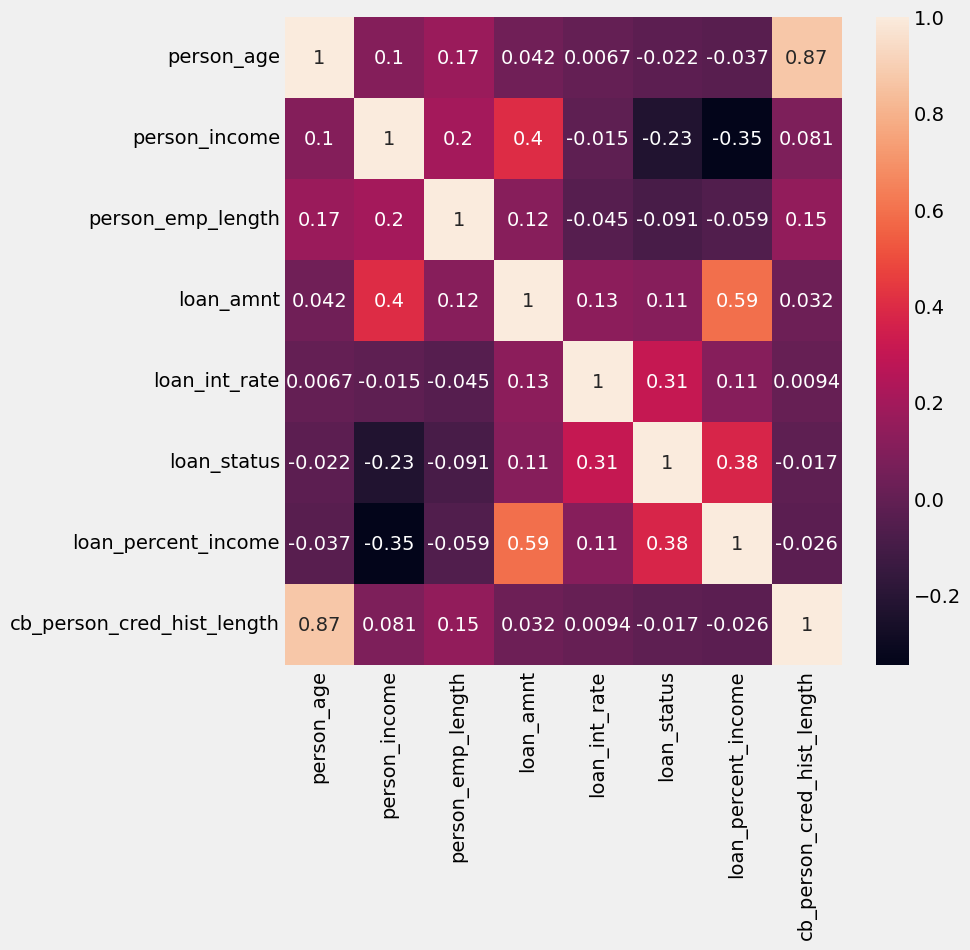

In [486]:
corr_matrix = df.corr()

plt.figure(figsize = (8, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

* **loan_int_rate:** It is highly positively correlated with the loan status, so a higher interest rate may result a rejection with a higher chance.
* **loan_percent_income:** We can see the same trand as in the loan interest rate.

# Data preprocessing

## One-Hot Encoding

In [487]:
object_columns = df[['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade']]

encoder = OneHotEncoder(sparse = False)

encoded = encoder.fit_transform(object_columns)

new_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out(object_columns.columns))

new_df

C:\Users\ZEPHYRUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32232,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32233,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [488]:
new_df.index = df.index

df = pd.concat([df, new_df], axis = 1)

df = df.drop(object_columns, axis = 1)

df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
1,21,9600,5.0,1000,11.14,0,0.10,2,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,3,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,4,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,21,9900,2.0,2500,7.14,1,0.25,2,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,4.0,20000,15.58,1,0.31,19,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32575,52,64500,0.0,5000,11.26,0,0.08,20,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32576,57,53000,1.0,5800,13.16,0,0.11,30,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train test split and scaling

In [489]:
X = df.drop(['loan_status'], axis = 1) #here I assume that the loan grading is based on other criterias
y = df['loan_status']

scalerX = MinMaxScaler(feature_range = (0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25789, 26)
(6448, 26)
(25789,)
(6448,)


# Implemention and Training of Models

In [490]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Random Forest Classification' : RandomForestClassifier(),
    'XGBClassifier' : XGBClassifier(),
    'Decesion Tree' : DecisionTreeClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'Ada Boost Classifier' : AdaBoostClassifier(),
    'Extra Trees Classifier' : ExtraTreesClassifier()
}

def implement (dictionary, input_train, output_train, input_test, output_test):
    dictionary.fit(input_train, output_train)
    accuracy = dictionary.score(input_test, output_test)
    y_pred = dictionary.predict(input_test)
    report = classification_report(output_test, y_pred)
    return accuracy, report



for name, model in models.items():
    model_accuracy, model_report = implement(model, X_train, y_train, X_test, y_test)
    print(f'{name} : {model_accuracy}\n')
    print(model_report)
    print('--'*27)
    print('--'*27)

C:\Users\ZEPHYRUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 0.8653846153846154

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5058
           1       0.76      0.55      0.64      1390

    accuracy                           0.87      6448
   macro avg       0.82      0.75      0.78      6448
weighted avg       0.86      0.87      0.86      6448

------------------------------------------------------
------------------------------------------------------
Random Forest Classification : 0.93424317617866

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5058
           1       0.96      0.72      0.83      1390

    accuracy                           0.93      6448
   macro avg       0.95      0.86      0.89      6448
weighted avg       0.94      0.93      0.93      6448

------------------------------------------------------
------------------------------------------------------
XGBClassifier : 0.9376550868486352


# Result
**Our best model was the XGBClassifier with a 93.7% accuracy, followed closely by the Random Forest Classifier with a 93.4% accuracy. These results indicate that ensemble methods are particularly effective for this dataset, providing accurate predictions.**